In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

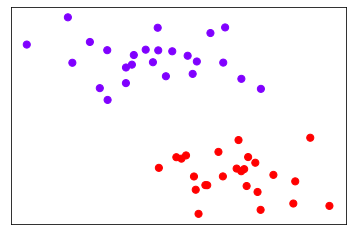

In [2]:
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
X.shape

(50, 2)

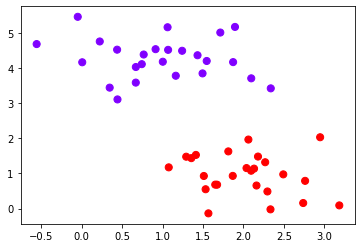

In [4]:
#作图,坐标轴
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

In [5]:
#取数据中关于两坐标轴的最大值,最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [6]:
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

In [7]:
axisy,axisx = np.meshgrid(axisy,axisx)
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵#核心是将两个特征向量广播，
#以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标

In [8]:
xy = np.vstack([axisx.ravel(),axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点

In [9]:
axisx.ravel().shape

(900,)

In [10]:
xy

array([[-0.75417405, -0.43660962],
       [-0.75417405, -0.22249355],
       [-0.75417405, -0.00837749],
       ...,
       [ 3.38380818,  5.34452415],
       [ 3.38380818,  5.55864022],
       [ 3.38380818,  5.77275628]])

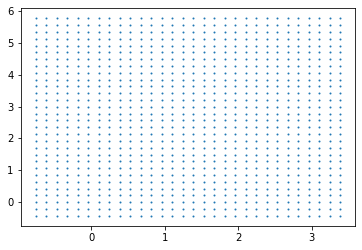

In [11]:
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

In [12]:
a = np.array([1,2,3])
b = np.array([7,8])
v1,v2 = np.meshgrid(a,b)

In [13]:
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [14]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

In [17]:
v = np.vstack([v1.ravel(),v2.ravel()]).T

In [18]:
v
#2*3=6

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])

In [19]:
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel="linear").fit(X,y)
z = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致

In [21]:
z.shape

(30, 30)

(-0.43660961990940284, 5.772756283035797)

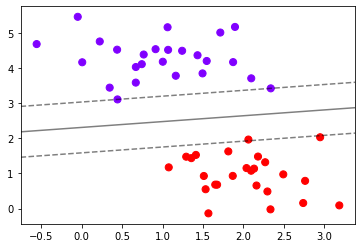

In [33]:
#画决策边界和平行于决策边界的超平面

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

ax.contour(axisx,axisy,z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5
           ,linestyles=["--","-","--"])
ax.set_xlim(xlim)#设置横坐标轴范围
ax.set_ylim(ylim)#设置纵坐标轴范围

In [28]:
xlim

(-0.7541740493109252, 3.3838081780236036)

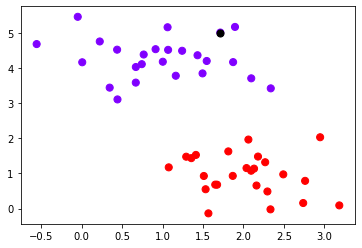

In [34]:
#记得Z的本质么？是输入的样本到决策边界的距离，而contour函数中的level其实是输入了这个距离
#让我们用一个点来试试看

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow")

In [36]:
clf.decision_function(X[10].reshape(1,2))
#返回该输入的样本所对应的到决策边界的距离

array([-3.33917354])

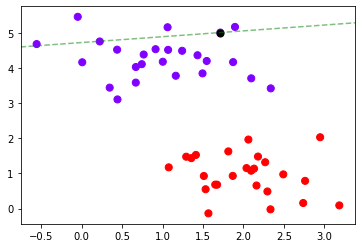

In [55]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow")
ax = plt.gca()
ax.contour(axisx,axisy,z
           ,colors="green"
           ,levels=[-3.33917354] #填入该距离用于划线
           ,alpha=0.5
           ,linestyles=["--"])

In [43]:
clf.predict(X)
#根据决策边界，对X中的样本进行分类，返回的结构为n_samples

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [44]:
clf.score(X,y)
#返回给定测试数据和标签的平均准确度

1.0

In [50]:
clf.support_vectors_
#返回支持向量

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [51]:
clf.n_support_
#返回每个类中支持向量的个数

array([2, 1])

(-0.43660961990940284, 5.772756283035797)

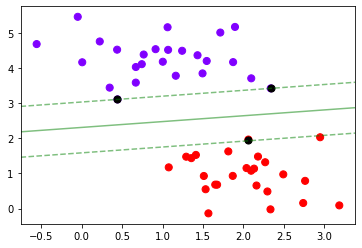

In [52]:
#画决策边界和平行于决策边界的超平面

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#画出支持向量
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],c="black",s=50,cmap="rainbow")

ax.contour(axisx,axisy,z
           ,colors="green"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5
           ,linestyles=["--","-","--"])
ax.set_xlim(xlim)#设置横坐标轴范围
ax.set_ylim(ylim)#设置纵坐标轴范围

In [12]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
X.shape

(100, 2)

In [14]:
y

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

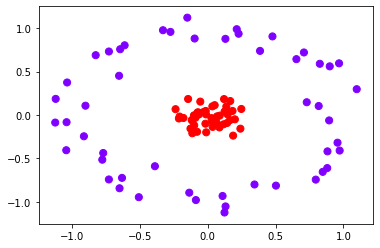

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()

In [18]:
#把画图封装成函数
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim

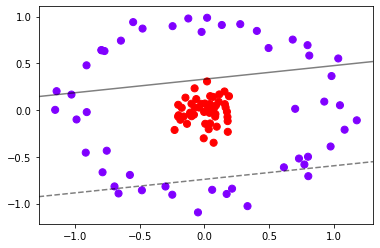

In [17]:
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [20]:
clf.score(X,y)

0.7

In [21]:
#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))

In [26]:
rlim = np.linspace(min(r),max(r),100)

In [28]:
rlim.shape

(100,)

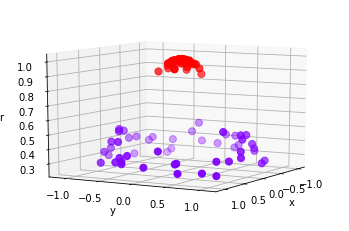

In [38]:
from mpl_toolkits import mplot3d
#定义一个绘制三维图像的函数

#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=10,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
    
plot_3D()